# Pendahuluan
Datasets yang digunakan adalah data marketing campaigns of portugese bank institution. Tujuan utama dari campaigns tersebut untuk mengetahui kebutuhan
bank untuk menentukan kontak klien yang telah bergabung deposito atau belum bergabung deposito. Isi dari datasets tersebut sebagai berikut :

1. Input variables :
- Age (numeric)
- job : type of job (categorical: 'admin', 'blue-collar', 'entrepreneur', 'student', 'technician', 'unemployed', 'unknown')
- marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'illiterate', 'professional.course', 'university.degree','unknown')
- default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

2. Related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular', 'telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

3. Other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

4. Social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

5. Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: 'yes', 'no')

# Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import imblearn as imbl
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import plotly.express as px
from random import randint
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, balanced_accuracy_score, classification_report,ConfusionMatrixDisplay, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df = df.rename(columns={'y': 'deposit'})
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
nan_count = df.isna().sum()
print(nan_count)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64


# Exploratory & Cleaning Data

In [6]:
df.duplicated().sum()

12

In [7]:
# Mengapus data duplikat
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [9]:
numeric = df.select_dtypes(include='number')

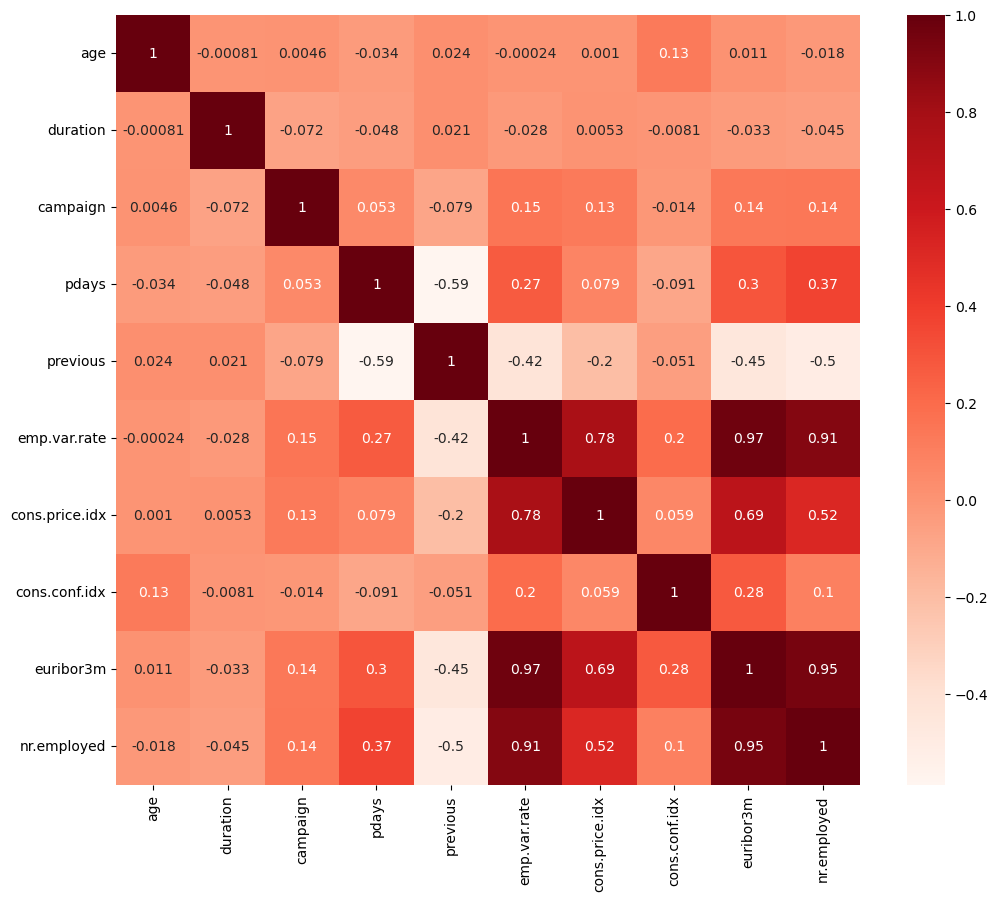

In [10]:
correlation = plt.figure(figsize=(12, 10))
sns.heatmap(numeric.corr(), cmap='Reds', annot=True)
plt.show() 

In [11]:
df["age"].value_counts().head(10)

age
31    1947
32    1845
33    1833
36    1779
35    1758
34    1745
30    1714
37    1475
29    1453
39    1430
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

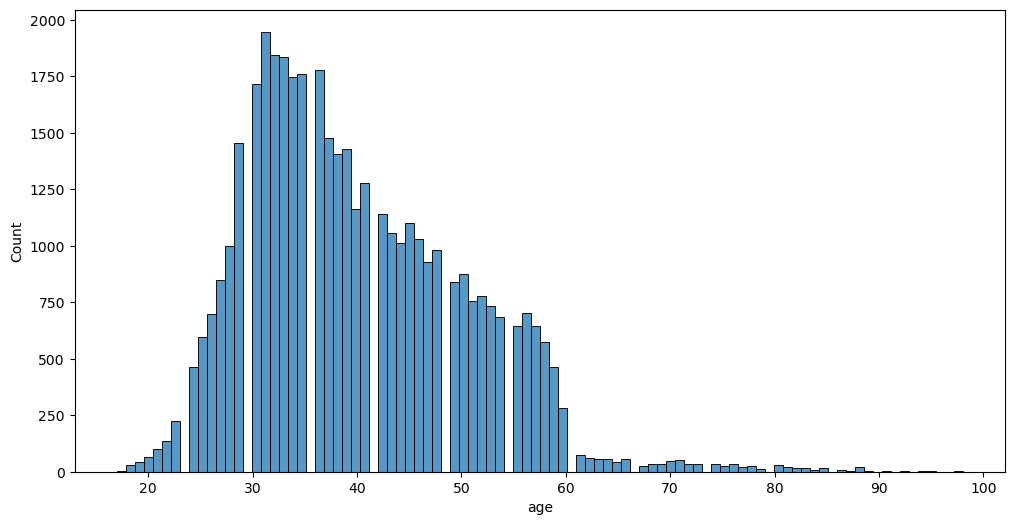

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(x="age",data=df)

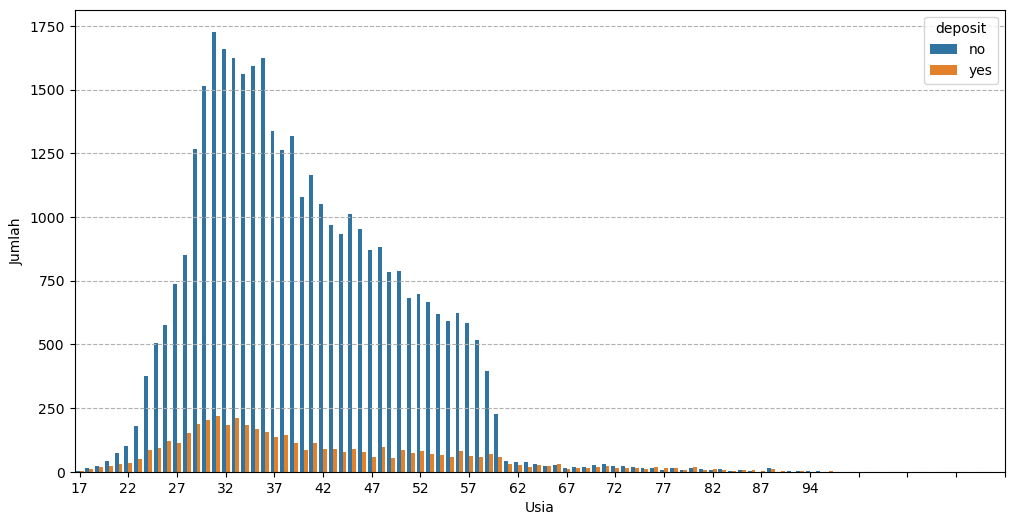

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x="age", data=df, hue="deposit")
plt.ylabel('Jumlah')
plt.xlabel('Usia')
plt.xticks(range(0, 100, 5))
plt.grid(axis='y', linestyle='--')
plt.show()

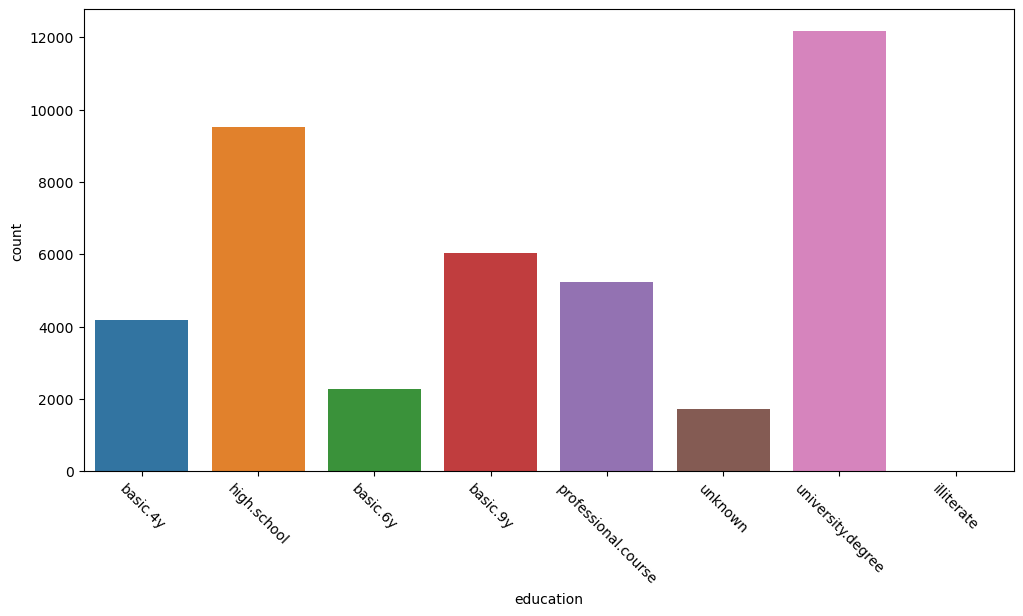

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x="education", data=df)
plt.xticks(rotation=-45)
plt.show()

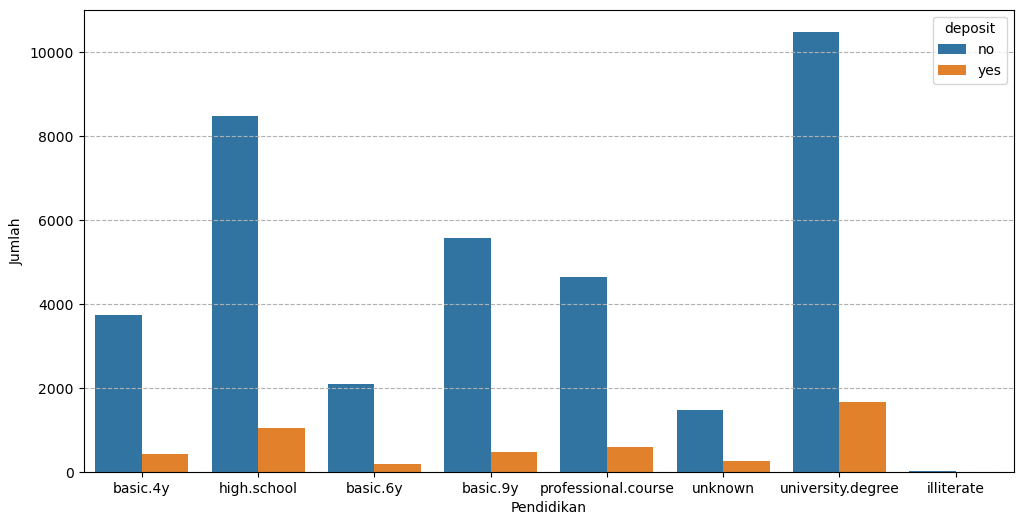

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x="education", data=df, hue="deposit")
plt.ylabel('Jumlah')
plt.xlabel('Pendidikan')
plt.grid(axis='y', linestyle='--')
plt.show()

In [16]:
df["job"].value_counts()

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [17]:
fig = px.pie(df, values=np.ones(41176), names='job', title='job')
fig.show()

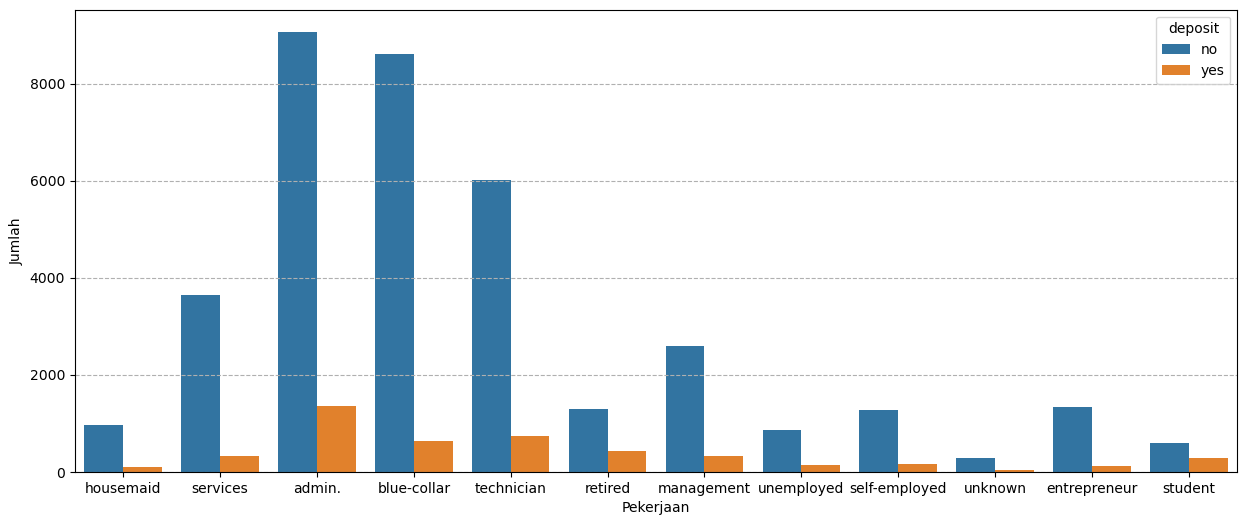

In [18]:
plt.figure(figsize=(15, 6))
sns.countplot(x="job", data=df, hue="deposit")
plt.ylabel('Jumlah')
plt.xlabel('Pekerjaan')
plt.grid(axis='y', linestyle='--')
plt.show()

# Pre-processing

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [20]:
numerical = ['age', 'duration','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'duration','campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
boolean = ['deposit']

In [21]:
boolean = np.array(boolean).ravel()

In [22]:
le = LabelEncoder()
for col in boolean:
    df[col] = le.fit_transform(df[col])
for col in categorical:
    df[col] = le.fit_transform(df[col])
for col in features:
    df[col] = le.fit_transform(df[col])


In [23]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,39,3,1,0,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,...,0,26,0,1,8,18,16,287,8,0


In [24]:
y = df["deposit"]
y = y.values
y = y.ravel()

In [25]:
X = df.drop(['contact', 'day_of_week', 'month', 'pdays', 'previous', 'deposit'], axis=1)

In [26]:
st = StandardScaler()

In [27]:
X["duration"] = st.fit_transform(X[["duration"]])
X["nr.employed"] = st.fit_transform(X[["nr.employed"]])

In [28]:
over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.3)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X, y = pipeline.fit_resample(X, y)

#X, y train test split
X_train , x_test ,y_train ,y_test =train_test_split(X,y ,test_size=0.30 ,random_state= 42)
print("{0:0.2f}% nilai training set". format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% nilai test set". format((len(x_test)/len(df.index)) * 100))

80.74% nilai training set
34.61% nilai test set


In [29]:
x_train=np.array(X_train)
x_test=np.array(x_test)
y_train=np.array(y_train).reshape(y_train.shape[0],1)
y_test=np.array(y_test).reshape(y_test.shape[0],1)

In [30]:
display("x train: ",X_train.shape)
display("x test: ",x_test.shape)
display("y train: ",y_train.shape)
display("y test: ",y_test.shape)

'x train: '

(33247, 15)

'x test: '

(14250, 15)

'y train: '

(33247, 1)

'y test: '

(14250, 1)

# Logistic Regression

In [31]:
#LOG REG
param_dist_LG = {"penalty": ['l1', 'l2', 'elasticnet', None],
              "fit_intercept": [True, False],
              "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
              "multi_class": ['auto', 'ovr', 'multinomial']}

Log = LogisticRegression()
Log_reg = RandomizedSearchCV(Log, param_dist_LG, cv=50)

In [32]:
#Log_reg = LogisticRegression(solver='liblinear', random_state=0)

In [33]:
Log_reg.fit(X_train, y_train)
y_pred = Log_reg.fit(X_train, y_train).predict(x_test)
Log_accuracy = accuracy_score(y_test, y_pred)
Log_f1 = f1_score(y_test, y_pred)
Log_precision = precision_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
Log_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)


print("Accuracy: ", Log_accuracy)
print("f1: ", Log_f1)
print("precision: ", Log_precision)
print("recall: ", log_recall)
print("Balanced acc : ", Log_balanced_accuracy)

Accuracy:  0.8708070175438597
f1:  0.6982461891493198
precision:  0.7497360084477297
recall:  0.6533742331288344
Balanced acc :  0.7943395278474017


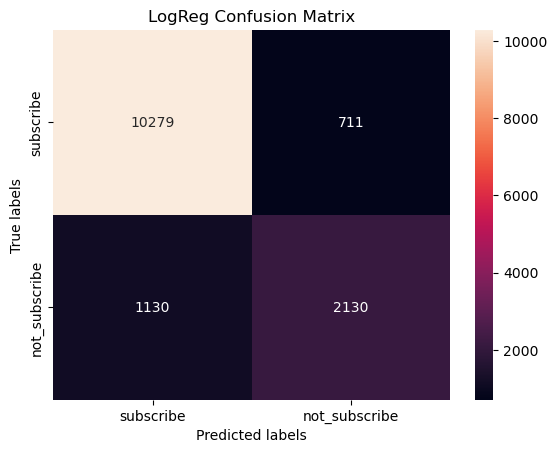

In [34]:
Log_cm = confusion_matrix(y_test,y_pred, labels=Log_reg.classes_)
ax= plt.subplot()
sns.heatmap(Log_cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('LogReg Confusion Matrix');
ax.xaxis.set_ticklabels(['subscribe','not_subscribe']); ax.yaxis.set_ticklabels(['subscribe','not_subscribe']);

In [35]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.35943425331504003


# K-Nearest Neighbor

In [36]:
#KNN
param_dist_KNN = {"n_neighbors": [1, 5, 10, 15, 20, 25],
              "algorithm": ["ball_tree", "kd_tree", "brute"],
              "leaf_size": [10, 20, 30, 40, 50],
              "p": [1.0, 2.0],
              "weights": ["uniform", "distance", None]}

knn = KNeighborsClassifier()
knn_cv = RandomizedSearchCV(knn, param_dist_KNN, cv=50)

In [37]:
knn_cv.fit(x_train, y_train)
knn_pred = knn_cv.fit(x_train, y_train).predict(x_test)

knn_accuracy = accuracy_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_balanced_accuracy = balanced_accuracy_score(y_test, knn_pred)

print("accuracy: ",knn_accuracy)
print("f1 score:", knn_f1)
print("precision: ", knn_precision)
print("recall: ", knn_recall)
print("balanced accuracy: ",knn_balanced_accuracy)

accuracy:  0.9084912280701755
f1 score: 0.809801633605601
precision:  0.7719688542825361
recall:  0.8515337423312883
balanced accuracy:  0.8884602287634604


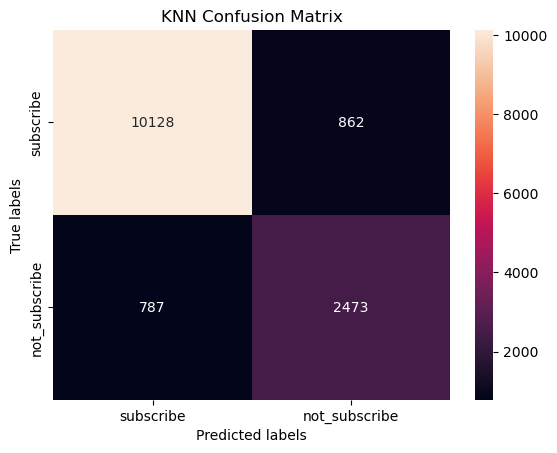

In [38]:
knn_y_pred = knn_cv.fit(x_train, y_train).predict(x_test)
knn_cm = confusion_matrix(y_test,knn_y_pred)

ax= plt.subplot()
sns.heatmap(knn_cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('KNN Confusion Matrix');
ax.xaxis.set_ticklabels(['subscribe','not_subscribe']); ax.yaxis.set_ticklabels(['subscribe','not_subscribe']);

In [39]:
rmse = np.sqrt(mean_squared_error(y_test, knn_y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.3401753933570358


# Support Vector Machine

In [40]:
svm = SVC(gamma="auto")

In [41]:
svm.fit(x_train, y_train)
svm_pred = svm.fit(x_train, y_train).predict(x_test)

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_balanced_accuracy = balanced_accuracy_score(y_test, svm_pred)

print("accuracy: ",svm_accuracy)
print("f1 score:", svm_f1)
print("precision: ", svm_precision)
print("recall: ", svm_recall)
print("balanced accuracy: ",svm_balanced_accuracy)

accuracy:  0.9048421052631579
f1 score: 0.7888508252880723
precision:  0.8010752688172043
recall:  0.7769938650306748
balanced accuracy:  0.8598800080385403


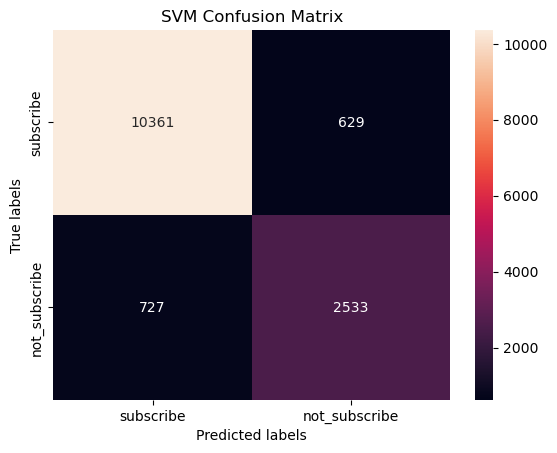

In [42]:
svm_y_pred = svm.fit(x_train, y_train).predict(x_test)
svm_cm = confusion_matrix(y_test,svm_y_pred)

ax= plt.subplot()
sns.heatmap(svm_cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('SVM Confusion Matrix');
ax.xaxis.set_ticklabels(['subscribe','not_subscribe']); ax.yaxis.set_ticklabels(['subscribe','not_subscribe']);

In [43]:
rmse = np.sqrt(mean_squared_error(y_test, svm_y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.30847673289381505


# Decision Tree

In [44]:
param_dist_DT = {"criterion": ['gini', 'entropy', 'log_loss'],
              "splitter": ['best', 'random'],
              "max_features": ['sqrt', 'log2', 'auto']}

dt = DecisionTreeClassifier()
dt_cv = RandomizedSearchCV(dt, param_dist_DT, cv=50)

In [45]:
dt_cv.fit(x_train, y_train)
dt_pred = dt_cv.fit(x_train, y_train).predict(x_test)

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_balanced_accuracy = balanced_accuracy_score(y_test, dt_pred)

print("accuracy: ",dt_accuracy)
print("f1 score:", dt_f1)
print("precision: ", dt_precision)
print("recall: ", dt_recall)
print("balanced accuracy: ",dt_balanced_accuracy)

accuracy:  0.8777543859649123
f1 score: 0.7401551312649165
precision:  0.7203832752613241
recall:  0.7610429447852761
balanced accuracy:  0.8367089155227563


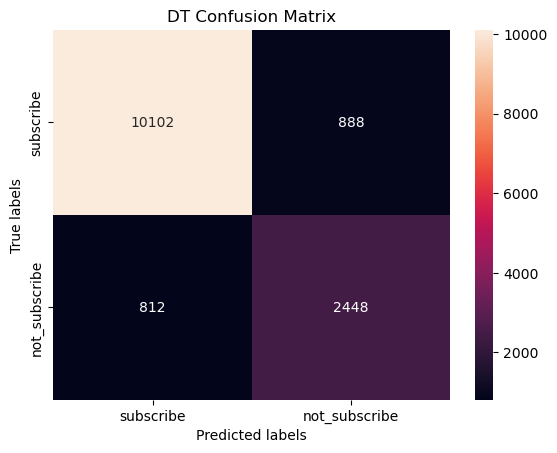

In [46]:
dt_y_pred = dt_cv.fit(x_train, y_train).predict(x_test)
dt_cm = confusion_matrix(y_test,dt_y_pred)

ax= plt.subplot()
sns.heatmap(dt_cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('DT Confusion Matrix');
ax.xaxis.set_ticklabels(['subscribe','not_subscribe']); ax.yaxis.set_ticklabels(['subscribe','not_subscribe']);

In [47]:
rmse = np.sqrt(mean_squared_error(y_test, dt_y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.34539578111788666


# Random Forest

In [48]:
param_dist_RF = {"n_estimators": [0.01, 0.1, 1, 10, 100, 1000],
              "max_features": ["sqrt", "log2", None],
              "min_samples_split": [1,2,3,4,5],
              "min_samples_leaf": [1,2,3,4,5],
              "max_leaf_nodes": [1, 10, None],
              "min_impurity_decrease": [0.0, 1.0],
              "class_weight": ["balanced", "balanced_subsample", None],
              "criterion": ["gini", "entropy", "logloss"]}

rfc = RandomForestClassifier()
rfc_cv = RandomizedSearchCV(rfc, param_dist_RF, cv=50)

In [49]:
rfc_cv.fit(x_train, y_train)
rfc_pred = rfc_cv.fit(x_train, y_train).predict(x_test)

rfc_accuracy = accuracy_score(y_test, rfc_pred)
rfc_f1 = f1_score(y_test, rfc_pred)
rfc_precision = precision_score(y_test, rfc_pred)
rfc_recall = recall_score(y_test, rfc_pred)
rfc_balanced_accuracy = balanced_accuracy_score(y_test, rfc_pred)

print("accuracy: ",rfc_accuracy)
print("f1 score:", rfc_f1)
print("precision: ", rfc_precision)
print("recall: ", rfc_recall)
print("balanced accuracy: ",rfc_balanced_accuracy)

accuracy:  0.8995087719298246
f1 score: 0.8067476383265857
precision:  0.7202409638554217
recall:  0.9168711656441718
balanced accuracy:  0.9056148366892378


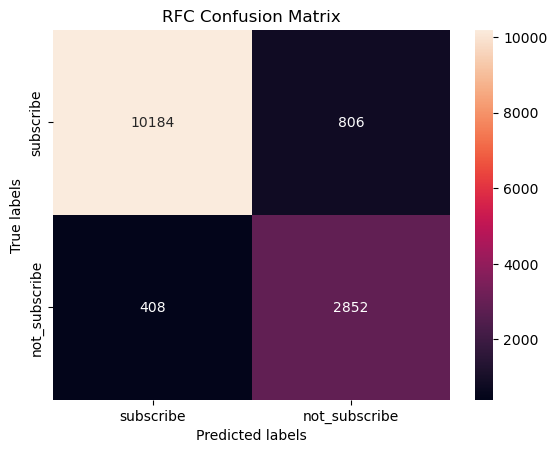

In [50]:
rfc_y_pred = rfc_cv.fit(x_train, y_train).predict(x_test)
rfc_cm = confusion_matrix(y_test,rfc_y_pred)

ax= plt.subplot()
sns.heatmap(rfc_cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('RFC Confusion Matrix');
ax.xaxis.set_ticklabels(['subscribe','not_subscribe']); ax.yaxis.set_ticklabels(['subscribe','not_subscribe']);

In [51]:
rmse = np.sqrt(mean_squared_error(y_test, rfc_y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.2918783692844339


# Naive Bayes

In [52]:
gnb = GaussianNB()

gnb.fit(x_train, y_train)
gnb_pred = gnb.fit(x_train, y_train).predict(x_test)

gnb_accuracy = accuracy_score(y_test, gnb_pred)
gnb_f1 = f1_score(y_test, gnb_pred)
gnb_precision = precision_score(y_test, gnb_pred)
gnb_recall = recall_score(y_test, gnb_pred)
gnb_balanced_accuracy = balanced_accuracy_score(y_test, gnb_pred)

print("accuracy: ",gnb_accuracy)
print("f1 score:", gnb_f1)
print("precision: ", gnb_precision)
print("recall: ", gnb_recall)
print("balanced accuracy: ",gnb_balanced_accuracy)

accuracy:  0.8270877192982456
f1 score: 0.6695278969957082
precision:  0.5948522402287894
recall:  0.7656441717791411
balanced accuracy:  0.8054790467630919


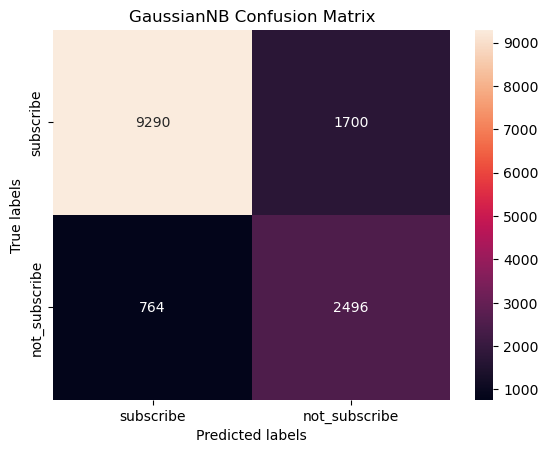

In [53]:
gnb_y_pred = gnb.fit(x_train, y_train).predict(x_test)
gnb_cm = confusion_matrix(y_test,gnb_y_pred)

ax= plt.subplot()
sns.heatmap(gnb_cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('GaussianNB Confusion Matrix');
ax.xaxis.set_ticklabels(['subscribe','not_subscribe']); ax.yaxis.set_ticklabels(['subscribe','not_subscribe']);

In [54]:
rmse = np.sqrt(mean_squared_error(y_test, gnb_y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.41582722457981797


# Results

In [56]:

# Membuat dictionary dari hasil training model
results = {
    'Model': ['K-Nearest Neighbors', 'Support Vector Machine', 'Decision Tree Classifier', 'Logistic Regression', 'Random Forest','Naive Bayes'],
    'Accuracy': [knn_accuracy, svm_accuracy, dt_accuracy, Log_accuracy, rfc_accuracy, gnb_accuracy],
    'F1 Score': [knn_f1, svm_f1, dt_f1, Log_f1, rfc_f1, gnb_f1 ],
    'Precision': [knn_precision, svm_precision, dt_precision, Log_precision, rfc_precision, gnb_precision ],
    'Recall': [knn_recall,svm_recall, dt_recall, log_recall, rfc_recall, gnb_recall],
    'Balanced Accuracy': [knn_balanced_accuracy,svm_balanced_accuracy, dt_balanced_accuracy, Log_balanced_accuracy, rfc_balanced_accuracy, gnb_balanced_accuracy ]
}

# Membuat DataFrame dari dictionary
df_results = pd.DataFrame(results)
print(df_results)

                      Model  Accuracy  F1 Score  Precision    Recall  \
0       K-Nearest Neighbors  0.908491  0.809802   0.771969  0.851534   
1    Support Vector Machine  0.904842  0.788851   0.801075  0.776994   
2  Decision Tree Classifier  0.877754  0.740155   0.720383  0.761043   
3       Logistic Regression  0.870807  0.698246   0.749736  0.653374   
4             Random Forest  0.899509  0.806748   0.720241  0.916871   
5               Naive Bayes  0.827088  0.669528   0.594852  0.765644   

   Balanced Accuracy  
0           0.888460  
1           0.859880  
2           0.836709  
3           0.794340  
4           0.905615  
5           0.805479  


- Berdasarkan hasil pengolahan data didapatkan bahwa usia terbanyak subscribed deposito berkisar usia 30 an tahun dengan pekerjaan terbanyak sebagai admin dan rata-rata pendidikan dari lulusan universitas.
- Dari hasil pengujian 6 model didapatkan nilai balanced accuracy tertinggi 0.905615 untuk random forest
- Nilai error dari random forest terkecil sebesar 0.2918783692844339